In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as si
import pint

u=pint.UnitRegistry()

#other graphs on excel
#values copy and pasted from excel sheet

Q_h = np.array([157.27, 133.93, 108.48, 94.69, 59.27])
Q_std_h = np.array([10.19773284, 3.808314425, 2.825847312, 4.452167582, 2.182127719])
power_h = np.array([10.6,10.1,9.5,9.1,8.3])
rho = 998.2*(u.kg/u.m**3)
mu = .89*u.cP
g = (1*u.gravity).to(u.m/u.s**2)
pez_h = np.array([59.185,86.36,110.998,123.698,152.26])
inv_pez_h = (1/pez_h)

Q_c = np.array([159.1944127, 129.8377822, 103.7178484, 43.87327282])
Q_std_c = np.array([5.894390499,3.726579644,4.140995883,0.989811026])
power_c = np.array([11.2,10.5,9.9,8.5])
pez_c = np.array([-70.5,-43,-17.5,-7])
inv_pez_c = 1/pez_c

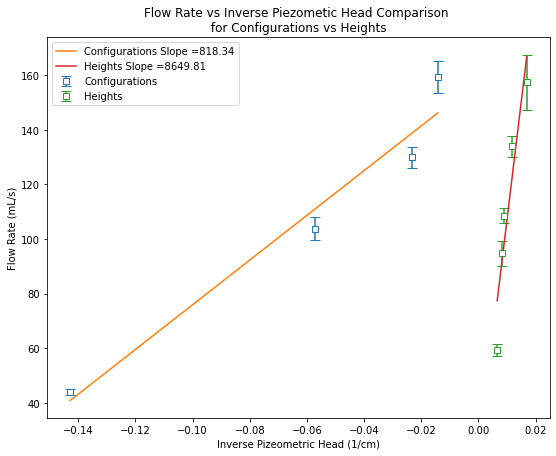

In [2]:
#Flow Rate vs Inverse Pizeometric Head

linreg_h = st.linregress(inv_pez_h,Q_h)
slope_h = linreg_h.slope
inter_h = linreg_h.intercept

linreg_c = st.linregress(inv_pez_c,Q_c)
slope_c = linreg_c.slope
inter_c = linreg_c.intercept

plt.figure(figsize=(9,7))
plt.errorbar(inv_pez_c,Q_c,yerr=Q_std_c,capsize=5,marker='s',markerfacecolor='white',label = "Configurations",linestyle='')
plt.plot(inv_pez_c, slope_c*inv_pez_c + inter_c , label = "Configurations Slope ={}".format(round(slope_c,2)))

plt.errorbar(inv_pez_h,Q_h,yerr=Q_std_h,capsize=5,marker='s',markerfacecolor='white',label = "Heights",linestyle='')
plt.plot(inv_pez_h, slope_h*inv_pez_h + inter_h , label = "Heights Slope ={}".format(round(slope_h,2)))

plt.title("Flow Rate vs Inverse Piezometic Head Comparison \n for Configurations vs Heights ")
plt.xlabel("Inverse Pizeometric Head (1/cm)")
plt.ylabel("Flow Rate (mL/s)")

plt.legend()
plt.show()

In [3]:
#Eff based off first figure

eff_c = rho * g * (slope_c*(u.mL/u.s/(1/u.cm))) / (power_c*u.W)
eff_h = rho * g * (slope_h*(u.mL/u.s/(1/u.cm))) / (power_h*u.W)
eff_c = eff_c.to_base_units()
eff_h = eff_h.to_base_units()

print("eff_c =",np.mean(eff_c))
print("eff_h =",np.mean(eff_h))

eff_c = 0.008074396898806171 dimensionless
eff_h = 0.08958137625412302 dimensionless


In [33]:
#Determine Friction Factor for Heights

power_h = power_h
pez_h = pez_h /100 #m
dz_h = np.array([52.2,79.5,104.14,118.1,145.4])
dz_h = dz_h / 100 #m
d_h = 1.4 / 100#m
l_h = 180.34 / 100 #m
pipe_eps = .0015e-3
Re_h = np.array([16041.8898,13661.15789,11065.20128,9658.59061,6045.671828])
k = .75
g = 9.81 #m/s^2
rho = 998.2 #kg/m^3
v_h = np.array([102.1644812,87.00253685,70.46991113,61.51176147,38.50250399])
v_h = v_h / 100 #m/s
def cole(f, Re, D, eps):
    cw = -2 * np.log10(eps/(3.7 * D) + 2.51 / (Re * np.sqrt(f))) - 1/np.sqrt(f)
    return cw

def cole_scalar(f, *args):
    Re, D, eps = args
    return cole(f, Re, D, eps).sum()

def fit(k, v, g):
    loss = k * v**2 / (2 * g)
    return loss

ff_sol_h = si.root(cole_scalar, 0.01, args=(Re_h, d_h, pipe_eps))
fric_h = ff_sol_h.x
print(fric_h)
head_loss_h = fric_h * l_h / d_h * v_h**2 / (2 * g)
print("head loss in m:",np.sum(head_loss_h))

fitting_loss_h = fit(k,v_h,g)
print("fitting loss in m:",np.sum(fitting_loss_h))

predict_Q_h = ((eff_h * power_h) / (rho * g)) * [(1/((v_h**2/2*g) + pez_h + dz_h + head_loss_h + fitting_loss_h))]
print(predict_Q_h)

[0.03050122]
head loss in m: 0.5655020268770592
fitting loss in m: 0.10794789994079894
[157.2746033,133.927889,108.4839921,94.69191357,59.267008] dimensionless


In [31]:
#Determine Friction Factor for Configurations

power_c = power_c
pez_c = pez_c /100
dz_c = np.array([23.5,51,76.5,110])
dz_c = dz_c / 100
d_c = 1.33/100
l_c = 182/100
pipe_eps = .0015e-3
Re_c = np.array([17084.10456,13933.66895,11130.58264,4708.303309])
k = .75
g = 9.81
rho = 0.000089
v_c = np.array([114.5283545,93.40847637,74.61715711,31.56350562])
v_c = v_c /100

def cole(f, Re, D, eps):
    cw = -2 * np.log10(eps/(3.7 * D) + 2.51 / (Re * np.sqrt(f))) - 1/np.sqrt(f)
    return cw

def cole_scalar(f, *args):
    Re, D, eps = args
    return cole(f, Re, D, eps).sum()

def fit(k, v, g):
    loss = k * v**2 / (2 * g)
    return loss

ff_sol_c = si.root(cole_scalar, 0.01, args=(Re_c, d_c, pipe_eps))
fric_c = ff_sol_c.x
print(fric_c)
head_loss_c = fric_c * l_c / d_c * v_c**2 / (2 * g)
print("head loss in m:",np.sum(head_loss_c))

fitting_loss_c = fit(k,v_c,g)
print("fitting loss in m:",np.sum(fitting_loss_c))

predict_Q_c = (eff_c * power_c) / (rho * g) * (1/(((v_c**2)/2*g) + pez_c + dz_c + head_loss_c + fitting_loss_c)) 
print(predict_Q_c)

[0.030633]
head loss in m: 0.6069015628929141
fitting loss in m: 0.10858510116377948
[13.108889649754623 18.315587374679957 25.232629833378265 56.85556664075592] dimensionless


In [41]:
#Determine Friction Factor for Configurations with added tubing

power_t = np.array([8.3,9,8])
pez_t = np.array([23.1,133])
dz_t = np.array([51,110])
d_t = .63
l_t = 426
pipe_eps = .0015e-3
Re_t = np.array([10836.60414,7061.704082])
k = .75
g = 981
v_t = np.array([99.94047433,74.32284025])

def cole(f, Re, D, eps):
    cw = -2 * np.log10(eps/(3.7 * D) + 2.51 / (Re * np.sqrt(f))) - 1/np.sqrt(f)
    return cw

def cole_scalar(f, *args):
    Re, D, eps = args
    return cole(f, Re, D, eps).sum()

def fit(k, v, g):
    loss = k * v**2 / (2 * g)
    return loss

ff_sol_t = si.root(cole_scalar, 0.01, args=(Re_t, d_t, pipe_eps))
fric_t = ff_sol_t.x
print(fric_t)
head_loss_t = fric_t * l_t / d_t * v_t**2 / (2 * g)
print("head loss in m:",np.sum(head_loss_t/100))

fitting_loss_t = fit(k,v_t,g)
print("fitting loss in m:",np.sum(fitting_loss_t/100))

predict_Q_t = (eff_c * power_t) / (rho * g) * [1/((v_t**2/2*g) + pez + dz + head_loss_t + fitting_loss_t)]
print(predict_Q_t)

[0.03200913]
head loss in m: 1.7112412113235176
fitting loss in m: 0.05929657107084254
[58.99527637 69.32455161] dimensionless


In [7]:
#Experimental Flow Rate vs Theoretical Flow Rate Figure

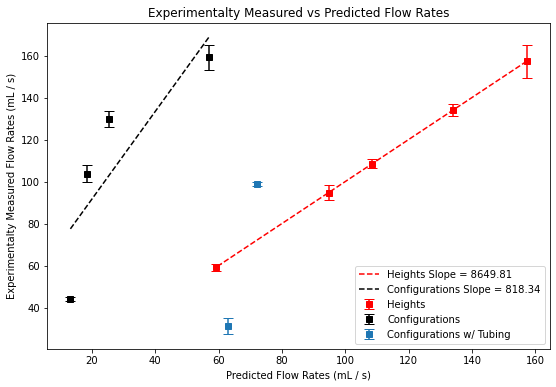

In [42]:
Q_pre_h = np.array([157.2746033,133.927889,108.4839921,94.69191357,59.267008])
Q_pre_c = np.array([56.85556664075592,25.232629833378265, 18.315587374679957,13.108889649754623])
Q_pre_t = np.array([72.20576429,62.85457826])
Q_t = np.array([98.84937753,31.18142799])

Qpre_std_h = Q_std_h / 1.3
Qpre_std_c = np.array([2.31675834,6.67275604,0.94888115,1.39110955])
Qpre_std_t = np.array([1.06782,3.7856])

qlr_h = st.linregress(Q_pre_h,Q_h)
qlr_slope_h = qlr_h.slope
qlr_inter_h = qlr_h.intercept

qlr_c = st.linregress(Q_pre_c,Q_c)
qlr_slope_c = qlr_c.slope
qlr_inter_c = qlr_c.intercept

qlr_t = st.linregress(Q_pre_t,Q_t)
qlr_slope_t = qlr_t.slope
qlr_inter_t = qlr_t.intercept

plt.figure(figsize=(9,6))
plt.errorbar(Q_pre_h,Q_h,yerr=Qpre_std_h,capsize=5,marker='s',label = "Heights",linestyle='',color='r')
plt.plot(Q_pre_h, qlr_slope_h*Q_pre_h + qlr_inter_h , label = "Heights Slope = {}".format(round(slope_h,2)),linestyle='--',color='r')

plt.errorbar(Q_pre_c,Q_c,yerr=Q_std_c,capsize=5,marker='s',label = "Configurations",linestyle='',color='k')
plt.plot(Q_pre_c, qlr_slope_c*Q_pre_c + qlr_inter_c , label = "Configurations Slope = {}".format(round(slope_c,2)),linestyle='--',color='k')

plt.errorbar(Q_pre_t,Q_t,yerr=Qpre_std_t,capsize=5,marker='s',label = "Configurations w/ Tubing",linestyle='')

plt.title('Experimentalty Measured vs Predicted Flow Rates')
plt.xlabel('Predicted Flow Rates (mL / s)')
plt.ylabel('Experimentalty Measured Flow Rates (mL / s)')

plt.legend(loc='lower right')
plt.show()